# <font color='blue'>Técnicas de Reducción de Varianza


En las simulaciones Monte Carlo, como en otras técnicas de muestreo <font color='red'> el error es proporcional a $\frac{1}{\sqrt{N}}$, siendo $N$ el tamaño de la muestra.</font>

Si consideramos la **precisión** como proporcional a la desviación estándar, entonces se sigue que la cantidad de trabajo computacional requerido varía con el cuadrado de la precisión deseada.

Los **métodos de reducción de varianza** buscan reducir esa constante de proporcionalidad para aumentar la precisión sin tener que aumentar el trabajo computacional.

Entre esos métodos, podemos mencionar:

* Variables antitéticas.
* Muestreo Importancia.
* Muestreo estratificado. 
* Variables de control.
* Monte Carlo condicional.

## <font color='blue'> Variables Antitéticas

Esta técnica se basa en el uso del teorema:

$$Var(\frac{X_1+X_2}{2})=\frac{1}{4}[Var(X_1)+Var(X_1)+2Cov(X_1+X_2)]$$

Supongamos que $\hat{\theta_1}$ es un estimador insesgado del párametro $\theta$ y que además $\hat{\theta_1}$ es una función de $m$ números aleatorios $R_1, ..., R_m$. Debido a que $1 - R_m$ sigue la misma distribución que $R_m$ (ambos $U(0,1)$), podemos construir otro estimador simplemente sustituyendo $R_m$ por $1-R_m$.  

Consideremos la estimación de la integral:

 <font color='red'> $$\mathcal{I}=\int_0^1 \frac{1}{1+x} dx$$

## Ejercicio:

* Calcular el valor exacto de esta integral.

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{m} \Big( \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m} \Big)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x) 

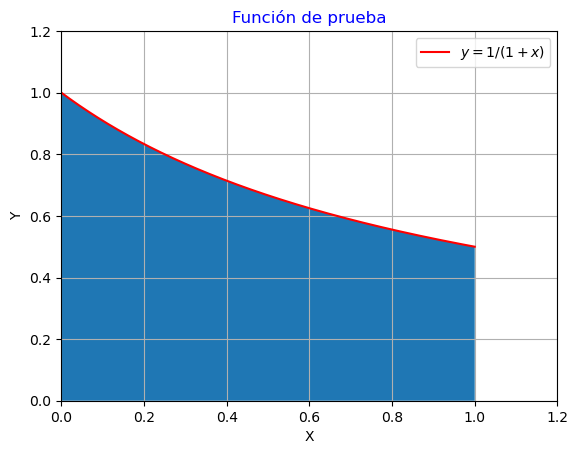

In [3]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{m} \Big( \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m} \Big)$$

In [4]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.68902
El error estándar es: 0.00253


In [5]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n), suma

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69083
El error estándar es: 0.00257


In [6]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69328
El error estándar es: 0.00045


In [7]:
def mc_crudo(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral con v antiteticas es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

In [8]:
def mc_crudo1(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

El valor de la integral es: 0.6924
El error estándar es: 0.00446
El valor de la integral con v antiteticas es: 0.69252
El error estándar es: 0.00076


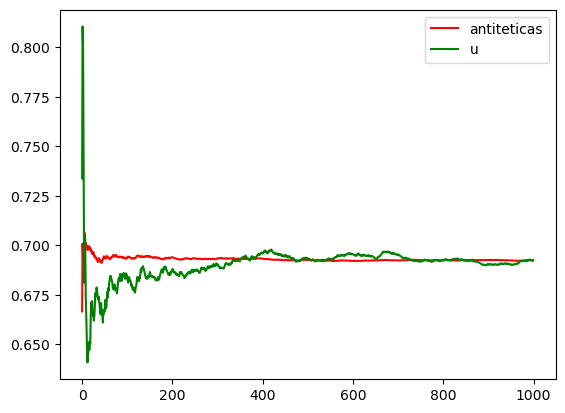

In [9]:
X1=mc_crudo1(funcion, n=1000)[2]
X=mc_crudo(funcion, n=1000)[2]

plt.plot(X, color='red', label='antiteticas')
plt.plot(X1, color='green', label='u')
plt.legend()

Supongamos que $\hat{\theta_1}$ es un estimador insesgado del párametro $\theta$ y que además $\hat{\theta_1}$ es una función de $m$ números aleatorios $R_1, ..., R_m$. Debido a que $1 - R_m$ sigue la misma distribución que $R_m$ (ambos $U(0,1)$), podemos construir otro estimador simplemente sustituyendo $R_m$ por $1-R_m$.  

## <font color='blue'> Variables de control

Aplicamos esta técnica cuando al estimar el parámetro $\theta$ mediante la variable aleatoria $X$ también contamos con otra variable $Y$, con $E(Y) = \mu_y$.

La variable:

$$Z = X + c(Y-\mu_y)$$

tiene el mismo valor esperado que $X$ para todo $c$.

La idea de esta técnica consiste en encontrar el valor $c$ que haga la varianza lo más pequeña posible.

$$V(Z)=V(x)+2cCov(X,Y)+ c^2V(Y)$$

Que tiene un mínimo para 

$$c= -\frac{Cov(X,Y)}{V(Y)}$$

Y ese mínimo tiene el valor:
    
$$V(Z)=V(X)-\frac{Cov(X,Y)^2}{V(Y)}$$

Y recordando que el coeficiente de correlación entre $X$ y $Y$ es:

$$r_{XY}=\frac{Cov(X,Y)}{\sqrt{V(X)V(Y)}}$$

Se tiene:

$$V(Z)=V(X)(1-r_{XY})$$

### Ejemplo

Calcular $\int_0^1 \frac{1}{1+x^2}dx$

Si usamos el método de Monte Carlo crudo (o de la media muestral) para estimar esta integral, nuestro estimador es:
    
$$X=\frac{\frac{1}{1 + U_1^2}+...+\frac{1}{1 + U_n^2}}{n}$$

La variable de control puede ser

$$Y=\frac{U_1+...+U_n}{n}$$

### Ejercicio:

Comprobar que $Cov(X,Y)=\frac{\frac{log(2)}{2}-\frac{\pi}{8}}{n}$

y

$c=-12 \frac{log(2)}{2}-\frac{\pi}{8}=0.5535$

Aquí completamos el ejercicio.

In [10]:
#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x**2) 

In [11]:
def integ(func=funcion, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.78431
El error estándar es: 0.0016


In [12]:
def integ_control(func=funcion, n=10000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u) + 0.5535*(u - 0.5)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ_control()[0],5))
print("El error estándar es:", round(integ_control()[1],5))

El valor de la integral es: 0.78516
El error estándar es: 0.00018
